In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [6]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


<AxesSubplot:>

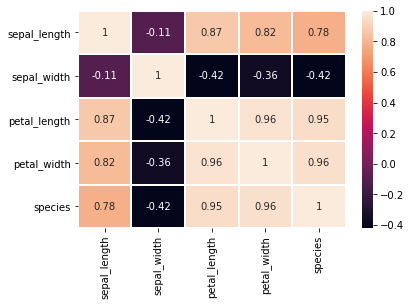

In [7]:
sns.heatmap(df.corr(),linewidths=1,annot=True)

From above plot, we can tell that **Species** is influenced more by **Petal Length & Width**.

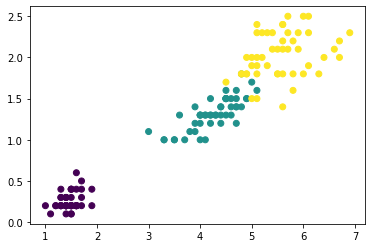

In [8]:
plt.scatter(df['petal_length'],df['petal_width'],c=df.species.values)

In [9]:
df.drop(['species'], axis=1, inplace=True)
df = df.values

### Elbow Method - Within Cluster Sum of Squares (wcss)

In [10]:
wcss = []
Ks = range(1, 11)
for i in Ks:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 48)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.400902116402136,
 33.99313485734541,
 29.771330051212413,
 27.730401211361748,
 25.777518037518046]

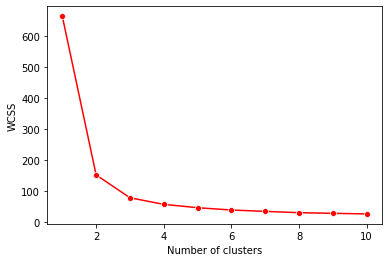

In [11]:
sns.lineplot(x=Ks, y=wcss ,marker='o', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K-value will be 3. With increase in no. of clusters, 'wcss' value decreases. We select K-value as 3, as rate of drop in wcss after 3 is minimum.

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=3)
y_labels = kmeans.fit_predict(df)
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

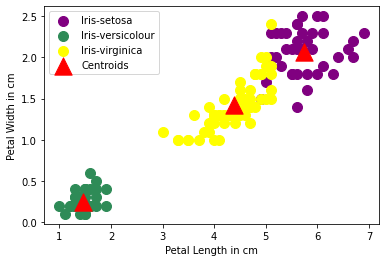

In [13]:
colors = ['purple','seagreen','yellow']
labels = ['Iris-setosa','Iris-versicolour','Iris-virginica']
for spcs,clr,lab in zip(set(y_labels),colors,labels):
    plt.scatter(df[y_labels==spcs,2], df[y_labels==spcs,3], s=100, c=clr, label=lab)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s=300, c='red', marker='^', label = 'Centroids')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()